### BGS Engineering Analytics:
Use the information on used cars previously sold to predict vehicle trim and dealer listing price given the other twenty-six variables provided.

Machine learning models: 
<br> DatasetLasso Regression, Ridge Regression, Elastic Net, Random Forest, Gradient Boosting Machines

CSV datasets: 
<br> Training_Dataset.csv, Test_Dataset.csv, Prediction_Dataset.csv (output)

#### Steps:
1. Data Cleaning
2. Data Transformation
3. Data Modeling
4. Model Evaluation
5. Data Prediction

<br>

#### Preparation: Install and Import Python libraries
Install Python libraries in Terminal:
<br>    python --version
<br>    python -m pip install seaborn
<br>    python -m pip install matplotlib

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Read training dataset
df = pd.read_csv('/Users/SW/Desktop/Challenge_Problem/Training_Dataset.csv') 

In [3]:
# Display the number of rows and columns of the training dataset
df.shape

(6298, 29)

In [4]:
# Display the first five rows of the training dataset
df.head()

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,...,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,...,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0
2,4777,Waukesha,False,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,53186.0,SUV,...,Jeep,38957.0,Grand Cherokee,Good Deal,Backed by a rigorous 125-point inspection by f...,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0
3,6242,Wentzville,False,Inventory Command Center,Century Dodge Chrysler Jeep RAM,4.4,21,MO,63385.0,SUV,...,Jeep,20404.0,Grand Cherokee,Good Deal,Drop by to see us and you will quickly see how...,Used,Automatic,2018,Limited,31977.0
4,7108,Fayetteville,False,HomeNet Automotive,Superior Buick GMC of Fayetteville,3.7,74,AR,72703.0,SUV,...,Cadillac,19788.0,XT5,Good Deal,"Luxury, Exterior Parking Camera Rear, Front Du...",Used,8-Speed Automatic,2018,Luxury,33495.0


#### Part 1: Data Cleaning
Clean the training dataset by replacing the missing numerial data with the column average, and the missing categorial data with "Missing" category. 

In [5]:
# Replace missing data
for column in df.select_dtypes(include=['float64', 'int64']).columns.tolist(): 
    df[column] = df[column].fillna(df[column].mean())
    
for column in df.select_dtypes(include=['object']).columns.tolist(): 
    df[column] = df[column].fillna('Missing')

In [6]:
# Display the first five rows of the cleaned dataset
df.head()

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,...,Jeep,39319.0,Grand Cherokee,Fair Price,Missing,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,...,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,Missing,2017,Missing,34860.0
2,4777,Waukesha,False,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,53186.0,SUV,...,Jeep,38957.0,Grand Cherokee,Good Deal,Backed by a rigorous 125-point inspection by f...,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0
3,6242,Wentzville,False,Inventory Command Center,Century Dodge Chrysler Jeep RAM,4.4,21,MO,63385.0,SUV,...,Jeep,20404.0,Grand Cherokee,Good Deal,Drop by to see us and you will quickly see how...,Used,Automatic,2018,Limited,31977.0
4,7108,Fayetteville,False,HomeNet Automotive,Superior Buick GMC of Fayetteville,3.7,74,AR,72703.0,SUV,...,Cadillac,19788.0,XT5,Good Deal,"Luxury, Exterior Parking Camera Rear, Front Du...",Used,8-Speed Automatic,2018,Luxury,33495.0


In [7]:
# Export Vehicle Trim, Vehicle Trim Code to Excel as reference table, use vlookup to convert result later
'''
from sklearn.preprocessing import LabelEncoder

label_encoders = LabelEncoder()
df['Vehicle_Trim_code'] = label_encoders.fit_transform(df['Vehicle_Trim'])

df[['Vehicle_Trim', 'Vehicle_Trim_code']].to_csv('/Users/SW/Desktop/Challenge_Problem/Vehicle_Trim_code.csv', index
= False)
'''

"\nfrom sklearn.preprocessing import LabelEncoder\n\nlabel_encoders = LabelEncoder()\ndf['Vehicle_Trim_code'] = label_encoders.fit_transform(df['Vehicle_Trim'])\n\ndf[['Vehicle_Trim', 'Vehicle_Trim_code']].to_csv('/Users/SW/Desktop/Challenge_Problem/Vehicle_Trim_code.csv', index\n= False)\n"

#### Part 2: Data Transformation
Transform all categorial data into interger so that we can put all columns into the model.

In [8]:
# Transform categorial data
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for column in df.select_dtypes(include=['object', 'bool']).columns.tolist(): 
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [9]:
# Display the first five rows of the transformed dataset
df.head()

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,1219,0,4,1862,5.0,32,21,48091.0,0,...,1,39319.0,0,0,3338,0,23,2015,5,30990.0
1,3920,382,0,0,1013,4.8,1456,27,58103.0,0,...,0,30352.0,1,1,2586,0,27,2017,16,34860.0
2,4777,1236,0,5,2401,4.8,1405,47,53186.0,0,...,1,38957.0,0,1,1487,0,14,2015,6,23249.0
3,6242,1251,0,4,524,4.4,21,23,63385.0,0,...,1,20404.0,0,1,2688,0,22,2018,8,31977.0
4,7108,387,0,3,2167,3.7,74,2,72703.0,0,...,0,19788.0,1,1,3321,0,10,2018,13,33495.0


#### Part 3: Data Modeling
Split the traning dateset in two, one for model training and one for selecting the best R^2 and MAE model.

In [10]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor

# Set up y as dependent variables and x as independent variables
y = make_regression(n_targets = 2)

y = df[['Vehicle_Trim', 'Dealer_Listing_Price']]
x = df.drop(['Vehicle_Trim', 'Dealer_Listing_Price'], axis = 1) # Split traning dateset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234) 

In [11]:
# Display the number of rows and columns of y_train
y_train.shape

(5038, 2)

#### Build Machine Learning Models: 
Lasso Regression, Ridge Regression, Elastic Net, Random Forest, Gradient Boosting Machines

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Build model pipelines
pipelines = {'lasso': make_pipeline(StandardScaler(), Lasso(random_state = 123)),
            'ridge': make_pipeline(StandardScaler(), Ridge(random_state = 123)),
            'enet': make_pipeline(StandardScaler(), ElasticNet(random_state = 123))}

pipelines['rf'] = make_pipeline(StandardScaler(), RandomForestRegressor(random_state = 123))
pipelines['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state = 123))

In [13]:
# Check pipelines
for key, value in pipelines.items(): print(key, type(value))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [14]:
# Declare hyperparameters to tune
lasso_hyperparameters = {'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
ridge_hyperparameters = {'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
enet_hyperparameters = {'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                        'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

rf_hyperparameters  = {'randomforestregressor__n_estimators': [100, 200],
                       'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]}

gb_hyperparameters = {'gradientboostingregressor__n_estimators' : [100, 200],
                      'gradientboostingregressor__learning_rate': [0.05, 0.1,0.2],
                      'gradientboostingregressor__max_depth': [1, 3, 5]}

hyperparameters = {'lasso': lasso_hyperparameters,
                   'ridge': ridge_hyperparameters,
                   'enet': enet_hyperparameters,
                   'rf': rf_hyperparameters,
                   'gb': gb_hyperparameters}

In [15]:
# Check hyperparameters
for key in ['lasso', 'ridge', 'enet', 'rf', 'gb']: 
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

lasso was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
enet was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.


#### Fit and tune models with cross-validation:

In [16]:
from sklearn.model_selection import GridSearchCV

# Model fitting
fitted_models = {}

In [17]:
# Check model fitting
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs = -1) 
    wrapper = MultiOutputRegressor(model)
    wrapper.fit(x_train, y_train)
    fitted_models[name] = wrapper
    
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.


/Users/sw/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8048.838417275925, tolerance: 21.234695985884425
  model = cd_fast.enet_coordinate_descent(
/Users/sw/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6576.5221793034725, tolerance: 21.587925827084245
  model = cd_fast.enet_coordinate_descent(
/Users/sw/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7492.067592813764, tolerance: 21.289246338773722
  model = cd_fast.enet_coordinate_descent(
/Users/sw/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coor

enet has been fitted.
rf has been fitted.
gb has been fitted.


In [18]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items(): 
    print(key, type(value))

lasso <class 'sklearn.multioutput.MultiOutputRegressor'>
ridge <class 'sklearn.multioutput.MultiOutputRegressor'>
enet <class 'sklearn.multioutput.MultiOutputRegressor'>
rf <class 'sklearn.multioutput.MultiOutputRegressor'>
gb <class 'sklearn.multioutput.MultiOutputRegressor'>


In [19]:
# Catch NotFittedError
from sklearn.exceptions import NotFittedError

for name, wrapper in fitted_models.items(): 
    try:
        pred = wrapper.predict(x_test)
        print(name, 'has been fitted.')
        
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


#### Part 4: Model Evaluation
Choose the best machine learning model with the highest R^2 and the lowest MAE.

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error

# Print R^2 and MAE of each model for comparison
for name, wrapper in fitted_models.items(): 
    print(name)
    pred = wrapper.predict(x_test)
    print('R^2:', r2_score(y_test, pred))
    print('MAE: ', mean_absolute_error(y_test, pred)) 
    print('\n')

lasso
R^2: 0.372198647460336
MAE:  1678.364786374706


ridge
R^2: 0.3716770141618147
MAE:  1681.0384239695832


enet
R^2: 0.3708555893323688
MAE:  1677.991518538202


rf
R^2: 0.7542172347453917
MAE:  1096.5467334980103


gb
R^2: 0.8063865391322884
MAE:  1049.0621753864102




In [21]:
# gb has the highest R^2 and the lowest MAE
gb_pred = fitted_models['gb'].predict(x_test)

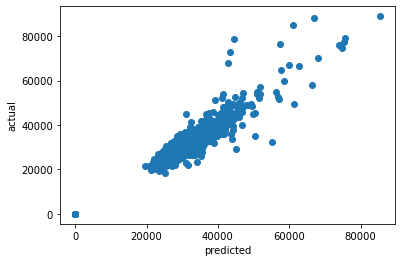

In [22]:
# Check if points scattered around the 45 degree diagonal
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [23]:
# Testing outputs
'''
pred = fitted_models['gb'].predict(x_test)

result = pd.DataFrame({'ListingID': x_test.ListingID,
                       'Vehicle_Trim': np.array(pred[:,0].astype(int)),
                       'Dealer_Listing_Price': np.array(pred[:,1])})

result.head()
'''

"\npred = fitted_models['gb'].predict(x_test)\n\nresult = pd.DataFrame({'ListingID': x_test.ListingID,\n                       'Vehicle_Trim': np.array(pred[:,0].astype(int)),\n                       'Dealer_Listing_Price': np.array(pred[:,1])})\n\nresult.head()\n"

#### Part 5: Data Prediction
Predict the test dataset using the fitted Gradient Boosting Machines model.

In [24]:
# Read Test_DataSet
df = pd.read_csv('/Users/SW/Desktop/Challenge_Problem/Test_Dataset.csv')

In [25]:
# Replace missing data
for column in df.select_dtypes(include=['float64', 'int64']).columns.tolist(): 
    df[column] = df[column].fillna(df[column].mean())
    
for column in df.select_dtypes(include=['object']).columns.tolist(): 
    df[column] = df[column].fillna('Missing')

In [26]:
# Transform categorial data
for column in df.select_dtypes(include=['object', 'bool']).columns.tolist(): 
    df[column] = LabelEncoder().fit_transform(df[column])

In [27]:
# Fit Gradient Boosting Machines model
pred = fitted_models['gb'].predict(df)

In [28]:
# Display the number of rows and columns of the prediction
pred.shape

(1000, 2)

In [29]:
# Prediction Results
result = pd.DataFrame({'ListingID': df.ListingID,
                       'Vehicle_Trim': np.array(pred[:,0].astype(int)),
                       'Dealer_Listing_Price': np.array(pred[:,1])})

In [30]:
# Display the first five rows of the prediction dataset
result.head()

,ListingID,Vehicle_Trim,Dealer_Listing_Price
0,8622015,6,37984.370968
1,8625693,2,23115.953399
2,8625750,0,24327.931671
3,8626885,0,23577.328658
4,8627430,11,37362.710115


In [31]:
# Export prediction to CSV file
result.to_csv('/Users/SW/Desktop/Challenge_Problem/Prediction_Dataset.csv', index = False)